<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/7_1_4_THEORY_Imputing_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imputation of missing values

## Univariate vs. Multivariate Imputation

One type of imputation algorithm is **univariate**, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. `impute.SimpleImputer`).

By contrast, **multivariate** imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. `impute.IterativeImputer`).

## About the data: "Travel times dataset"
> [Source](https://openmv.net/info/travel-times)

A driver uses an app to track GPS coordinates as he drives to work and back each day. The app collects the location and elevation data. Data for about 200 trips are summarized in this data set.

- `Date` of travel
- `StartTime:` when getting into the car
- `DayOfWeek:` the day name
- `GoingTo:` direction of travel
- `Distance `travelled in kilometers
- `MaxSpeed:` fastest speed recorded (all trips are on the 407 highway for some portion)
- `AvgSpeed:` the average speed for the entire trip
- `AvgMovingSpeed:` the average speed recorded only while the car is moving
- `FuelEconomy:` a rough estimate of fuel economy (it is inaccurate)
- `TotalTime:` duration of the entire trip, in minutes
- `MovingTime:` duration when the car was considered to be moving (i.e. not counting traffic delays, accidents, or time while the car is stationary)
- `Take407All:` is Yes if the 407 toll highway was taken for the entire trip. I try to avoid taking the 407, taking slower back routes to save costs. But some days I'm running late, or just lazy, and take it all the way.
- `Comments`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns


In [ ]:
!gdown "1ufTRyyj-mcZTj8gN7aSt5SSONEbs5IOy"

df = pd.read_csv(
  'travel-times.csv',
  parse_dates=[['Date', 'StartTime']],
  index_col='Date_StartTime'
)

Downloading...
From: https://drive.google.com/uc?id=1ufTRyyj-mcZTj8gN7aSt5SSONEbs5IOy
To: /content/travel-times.csv
100% 15.1k/15.1k [00:00<00:00, 28.0MB/s]


In [ ]:
df.head()

,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
Date_StartTime,,,,,,,,,,,
2012-01-06 16:37:00,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
2012-01-06 08:20:00,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2012-01-04 16:17:00,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
2012-01-04 07:53:00,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
2012-01-03 18:57:00,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2012-01-06 16:37:00 to 2011-07-11 16:56:00
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DayOfWeek       205 non-null    object 
 1   GoingTo         205 non-null    object 
 2   Distance        205 non-null    float64
 3   MaxSpeed        205 non-null    float64
 4   AvgSpeed        205 non-null    float64
 5   AvgMovingSpeed  205 non-null    float64
 6   FuelEconomy     188 non-null    object 
 7   TotalTime       205 non-null    float64
 8   MovingTime      205 non-null    float64
 9   Take407All      205 non-null    object 
 10  Comments        24 non-null     object 
dtypes: float64(6), object(5)
memory usage: 19.2+ KB


In [ ]:
df.describe()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,50.981512,127.591707,74.477561,81.975610,41.904390,37.871707
std,1.321205,4.128450,11.409816,10.111544,6.849476,4.835072
min,48.320000,112.200000,38.100000,50.300000,28.200000,27.100000
25%,50.650000,124.900000,68.900000,76.600000,38.400000,35.700000
50%,51.140000,127.400000,73.600000,81.400000,41.300000,37.600000
75%,51.630000,129.800000,79.900000,86.000000,44.400000,39.900000
max,60.320000,140.900000,107.700000,112.100000,82.300000,62.400000


In [ ]:
np.random.seed(2022)
mask = np.random.choice([True, False], size=df['MaxSpeed'].shape, p=[0.1, 0.9])
df['MaxSpeed'] = df['MaxSpeed'].mask(mask)


In [ ]:
df['MaxSpeed']

Date_StartTime
2012-01-06 16:37:00      NaN
2012-01-06 08:20:00    130.3
2012-01-04 16:17:00    127.4
2012-01-04 07:53:00      NaN
2012-01-03 18:57:00    136.2
                       ...  
2011-07-18 08:09:00    125.6
2011-07-14 08:03:00    123.7
2011-07-13 17:08:00    132.6
2011-07-12 17:51:00    125.8
2011-07-11 16:56:00    125.0
Name: MaxSpeed, Length: 205, dtype: float64

In [ ]:
df.head()

,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
Date_StartTime,,,,,,,,,,,
2012-01-06 16:37:00,Friday,Home,51.29,NaN,78.3,84.8,NaN,39.3,36.3,No,NaN
2012-01-06 08:20:00,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2012-01-04 16:17:00,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
2012-01-04 07:53:00,Wednesday,GSK,49.17,NaN,74.2,82.9,NaN,39.8,35.6,No,NaN
2012-01-03 18:57:00,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [ ]:
df.isnull().sum()

DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed           30
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [ ]:
df.isnull().mean()*100

DayOfWeek          0.000000
GoingTo            0.000000
Distance           0.000000
MaxSpeed          14.634146
AvgSpeed           0.000000
AvgMovingSpeed     0.000000
FuelEconomy        8.292683
TotalTime          0.000000
MovingTime         0.000000
Take407All         0.000000
Comments          88.292683
dtype: float64

## Univariate Imputation

### SimpleImputer

In [ ]:
# Mean Imputation
df_mean = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
#df_mean['MaxSpeed'] = mean_imputer.fit_transform(df_mean['MaxSpeed'].values.reshape(-1,1))
mean_imputer.fit(df_mean['MaxSpeed'].values.reshape(-1,1))
df_mean['MaxSpeed'] = mean_imputer.transform(df_mean['MaxSpeed'].values.reshape(-1,1))

In [ ]:
df_mean['MaxSpeed']

Date_StartTime
2012-01-06 16:37:00    127.656571
2012-01-06 08:20:00    130.300000
2012-01-04 16:17:00    127.400000
2012-01-04 07:53:00    127.656571
2012-01-03 18:57:00    136.200000
                          ...    
2011-07-18 08:09:00    125.600000
2011-07-14 08:03:00    123.700000
2011-07-13 17:08:00    132.600000
2011-07-12 17:51:00    125.800000
2011-07-11 16:56:00    125.000000
Name: MaxSpeed, Length: 205, dtype: float64

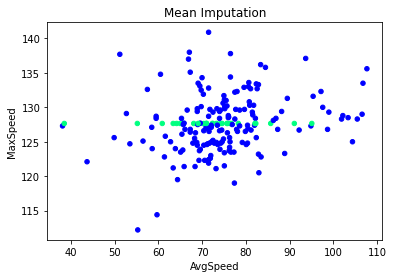

In [ ]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull()
fig = df_mean.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

In [ ]:
# Mode Imputation
df_mode = df.copy(deep=True)
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode['MaxSpeed'] = mode_imputer.fit_transform(df_mode['MaxSpeed'].values.reshape(-1,1))

[Text(0.5, 0, 'test')]

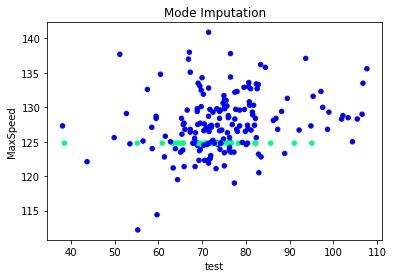

In [ ]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull()
fig = df_mode.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', colorbar=False, title='Mode Imputation')
fig.set(xlabel="test")

In [ ]:
# Time Series Imputation
df['MaxSpeed'][-72:-50]

Date_StartTime
2011-09-06 16:27:00    131.6
2011-09-06 07:50:00      NaN
2011-09-02 17:07:00    129.7
2011-09-02 07:39:00    132.7
2011-09-01 17:33:00    128.9
2011-09-01 08:08:00    126.8
2011-08-31 17:14:00    140.9
2011-08-31 08:09:00    127.7
2011-08-30 17:38:00    138.0
2011-08-30 07:57:00    133.5
2011-08-29 17:11:00    131.0
2011-08-29 07:48:00    124.0
2011-08-26 16:29:00    132.7
2011-08-26 07:49:00      NaN
2011-08-25 17:39:00      NaN
2011-08-25 09:09:00    133.5
2011-08-24 16:47:00    132.9
2011-08-24 07:59:00    127.1
2011-08-23 17:23:00    129.7
2011-08-23 07:54:00      NaN
2011-08-22 16:44:00    126.8
2011-08-22 07:49:00    123.8
Name: MaxSpeed, dtype: float64

In [ ]:
# Ffill method to replace nans with the last observed value
df['MaxSpeed'].fillna(method='ffill')[-72:-50]

Date_StartTime
2011-09-06 16:27:00    131.6
2011-09-06 07:50:00    131.6
2011-09-02 17:07:00    129.7
2011-09-02 07:39:00    132.7
2011-09-01 17:33:00    128.9
2011-09-01 08:08:00    126.8
2011-08-31 17:14:00    140.9
2011-08-31 08:09:00    127.7
2011-08-30 17:38:00    138.0
2011-08-30 07:57:00    133.5
2011-08-29 17:11:00    131.0
2011-08-29 07:48:00    124.0
2011-08-26 16:29:00    132.7
2011-08-26 07:49:00    132.7
2011-08-25 17:39:00    132.7
2011-08-25 09:09:00    133.5
2011-08-24 16:47:00    132.9
2011-08-24 07:59:00    127.1
2011-08-23 17:23:00    129.7
2011-08-23 07:54:00    129.7
2011-08-22 16:44:00    126.8
2011-08-22 07:49:00    123.8
Name: MaxSpeed, dtype: float64

In [ ]:
# Bfill method to replace nans with the next observed value
df['MaxSpeed'].fillna(method='bfill')[-72:-50]

Date_StartTime
2011-09-06 16:27:00    131.6
2011-09-06 07:50:00    129.7
2011-09-02 17:07:00    129.7
2011-09-02 07:39:00    132.7
2011-09-01 17:33:00    128.9
2011-09-01 08:08:00    126.8
2011-08-31 17:14:00    140.9
2011-08-31 08:09:00    127.7
2011-08-30 17:38:00    138.0
2011-08-30 07:57:00    133.5
2011-08-29 17:11:00    131.0
2011-08-29 07:48:00    124.0
2011-08-26 16:29:00    132.7
2011-08-26 07:49:00    133.5
2011-08-25 17:39:00    133.5
2011-08-25 09:09:00    133.5
2011-08-24 16:47:00    132.9
2011-08-24 07:59:00    127.1
2011-08-23 17:23:00    129.7
2011-08-23 07:54:00    126.8
2011-08-22 16:44:00    126.8
2011-08-22 07:49:00    123.8
Name: MaxSpeed, dtype: float64

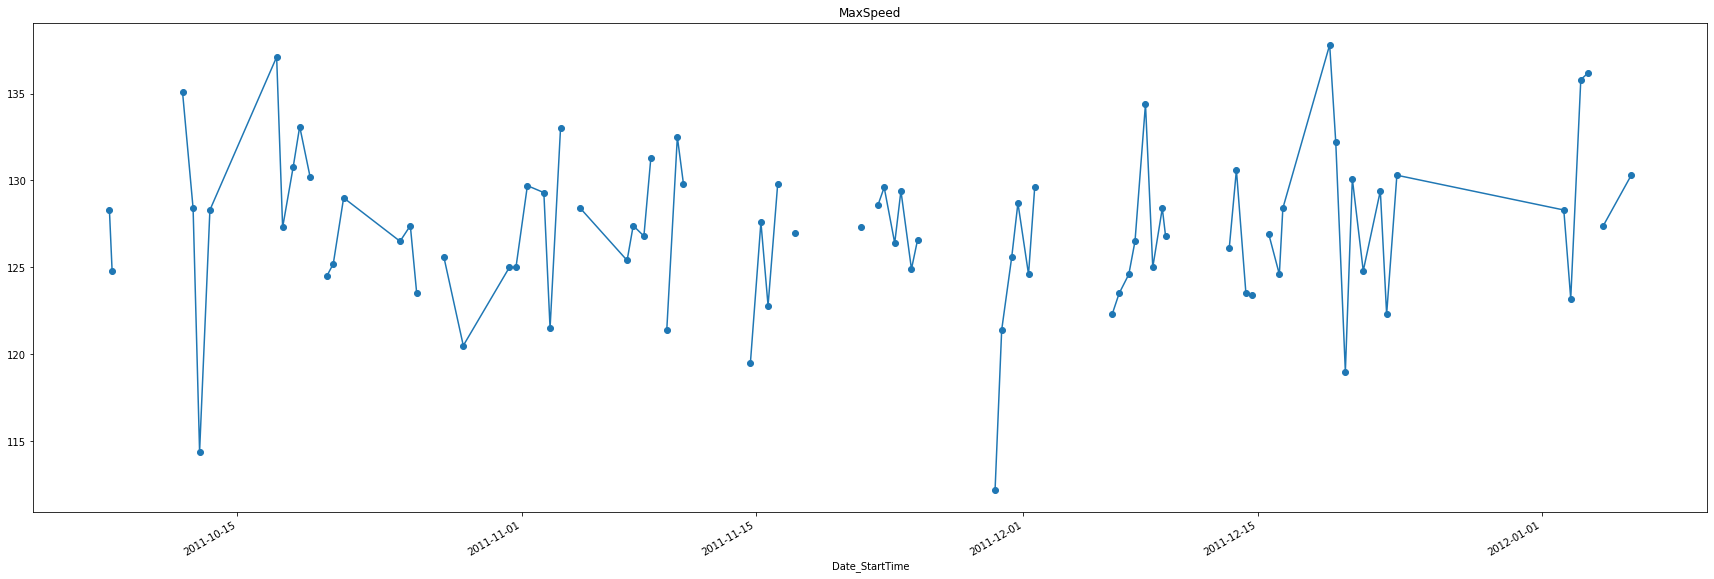

In [ ]:
df["MaxSpeed"][:100].plot(title="MaxSpeed", marker="o", figsize=(30,10))

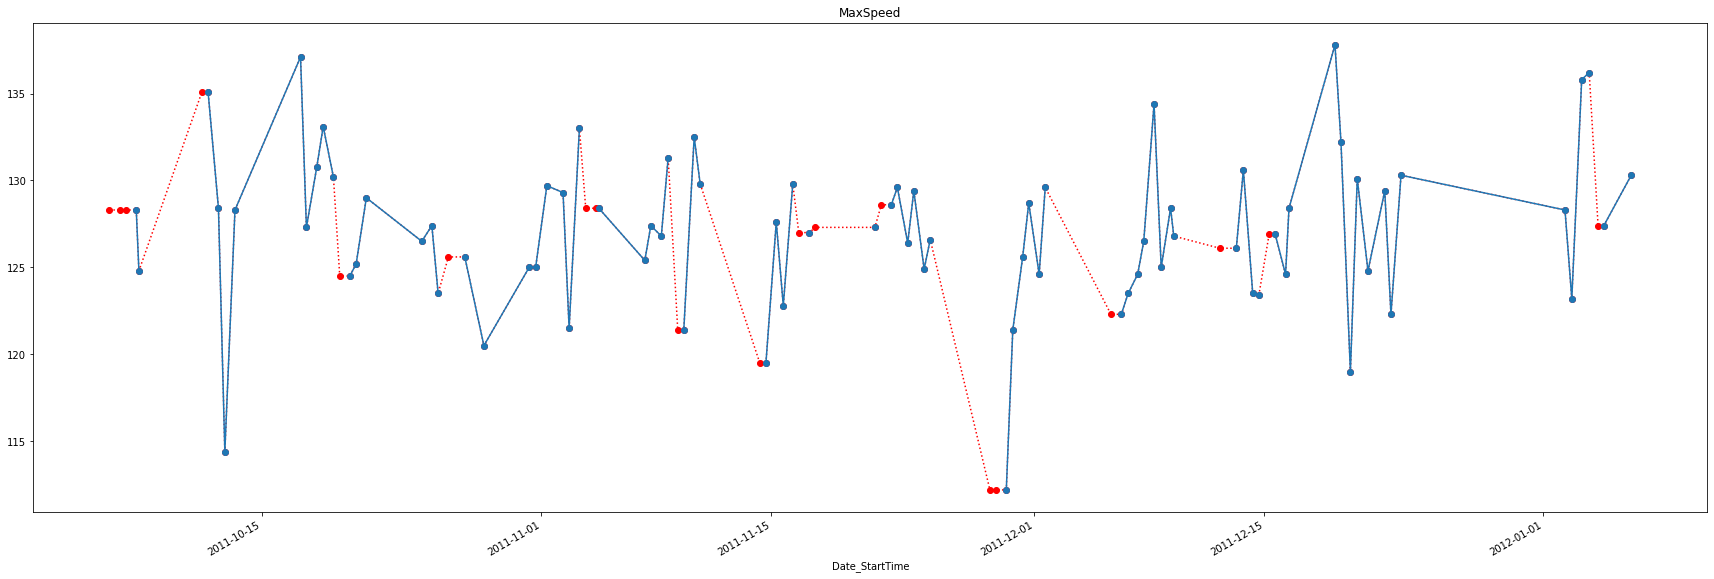

In [ ]:
# Ffill imputation
ffill_imp = df.fillna(method="ffill")
ffill_imp["MaxSpeed"][:100].plot(color="red", marker="o", linestyle="dotted", figsize=(30,10))
df["MaxSpeed"][:100].plot(title="MaxSpeed", marker="o")

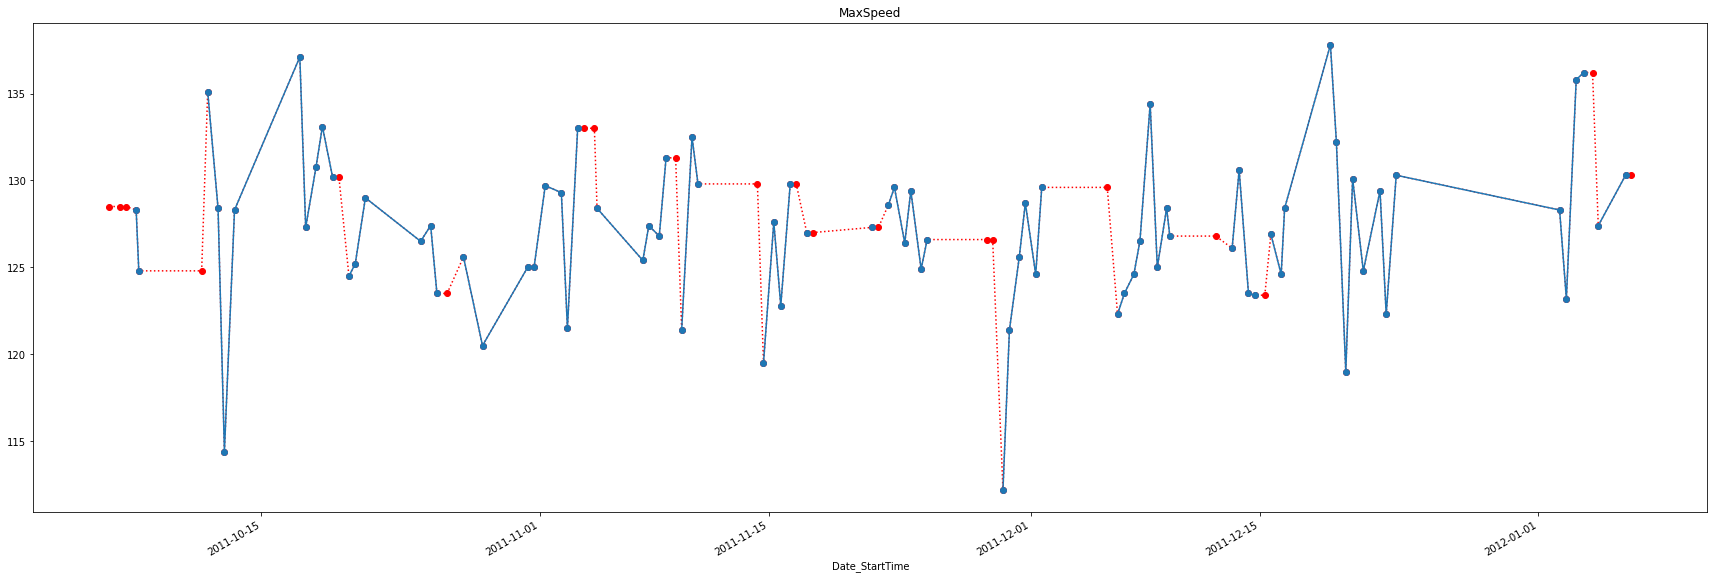

In [ ]:
# Bfill imputation
bfill_imp = df.fillna(method="bfill")
bfill_imp["MaxSpeed"][:100].plot(color="red", marker="o", linestyle="dotted", figsize=(30,10))
df["MaxSpeed"][:100].plot(title="MaxSpeed", marker="o")

## Multivariate Imputation


In [ ]:
# Advanced Techniques
# Imputing with IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_itimp = df[['Distance', 'MaxSpeed', 'AvgSpeed', 'AvgMovingSpeed']].copy()

imp = IterativeImputer(max_iter=10, random_state=2022)
imp.fit(df_itimp)

df_itimp_imputed = imp.transform(df_itimp)
df_itimp_imputed = pd.DataFrame(df_itimp_imputed, columns=df_itimp.columns)


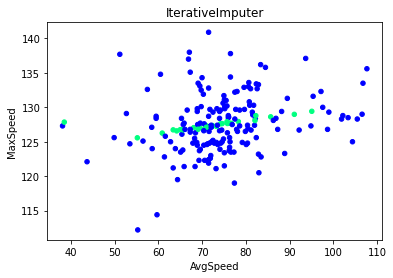

In [ ]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull()
fig = df_itimp_imputed.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='IterativeImputer', colorbar=False)

In [ ]:
# Advanced Techniques
# Imputing with KNNImputer
from sklearn.impute import KNNImputer

df_knn = df[['Distance',	'MaxSpeed',	'AvgSpeed',	'AvgMovingSpeed']].copy()

knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

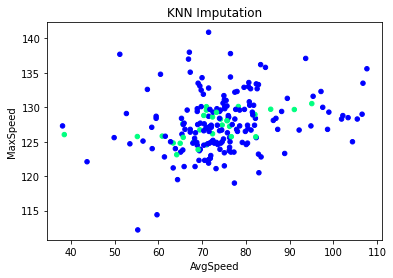

In [ ]:
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull()
fig = df_knn_imputed.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)